In [36]:
import pandas as pd
from collections import defaultdict

In [37]:
with open("coin_die_assignments.csv") as file:
    lines = file.read().splitlines()[1:]

In [38]:
lines = [x.split(",") for x in lines]

In [46]:
path = "../Stempelliste_bueschel_Neuses_einfach.xlsx"
df = pd.read_excel(path, engine='openpyxl')

averse = defaultdict(list)
reverse = defaultdict(list)

ID = df["Dédalo ID"]
A = df["Stempeluntergruppe Av"]
R = df["Stempeluntergruppe Rv"]

for id_val, av, rv in zip(ID, A, R):
    averse[av].append(id_val)
    reverse[rv].append(id_val)
    


In [47]:
Averse

defaultdict(list,
            {'Av_01': [3627,
              3628,
              3629,
              3630,
              3631,
              3618,
              3613,
              3632,
              3595,
              3594,
              3633,
              3634,
              3635,
              3636,
              3637,
              3638,
              3639,
              3640,
              3647,
              3648,
              3649,
              3650,
              3651],
             'Av_02': [3641,
              3642,
              3643,
              3644,
              3645,
              3646,
              3724,
              3725,
              3726,
              3727,
              3728,
              3729,
              3730],
             'Av_03': [3585,
              3654,
              3658,
              3659,
              3699,
              3660,
              3661,
              3662,
              3663,
              3605],
             nan: [3657,
       

In [41]:
# filter for coins that are not part of ground truth


In [42]:
lines
hmm_results = defaultdict(list)
for coin in lines:
    hmm_results[coin[1]].append(coin[2].split("/")[-1].split("_")[0])

In [43]:
hmm_results

defaultdict(list,
            {'31': ['2300', '3939', '2620', '3965', '253', '3111'],
             '33': ['3979',
              '3955',
              '2514',
              '2312',
              '3030',
              '2342',
              '2344',
              '3176',
              '3236',
              '3297',
              '2565',
              '241',
              '2430',
              '3341',
              '2388',
              '3359',
              '2684',
              '3125',
              '3530',
              '2334',
              '3277',
              '3036',
              '3222',
              '3145',
              '2586',
              '3339',
              '2874',
              '3972',
              '3342',
              '211',
              '233',
              '3235',
              '217',
              '2868',
              '2928',
              '3136',
              '3794',
              '3715',
              '2262',
              '3707'],
             '70': ['3976',
   

In [48]:
from collections import defaultdict
from itertools import combinations

# Step 1: Build reverse mapping from Averse
value_to_group = {}
for group, values in Averse.items():
    for v in values:
        value_to_group[v] = group

# Step 2: Count co-memberships
match_count = 0
total_pairs = 0

for hmm_group, hmm_values in hmm_results.items():
    # Convert strings to integers
    hmm_values_int = list(map(int, hmm_values))

    # Check all combinations of two values in hmm_results
    for v1, v2 in combinations(hmm_values_int, 2):
        total_pairs += 1
        # Check if both are in ground truth and belong to same Averse group
        if value_to_group.get(v1) == value_to_group.get(v2) and value_to_group.get(v1) is not None:
            match_count += 1

print(f"Matching pairs: {match_count} out of {total_pairs}")


Matching pairs: 133 out of 41942


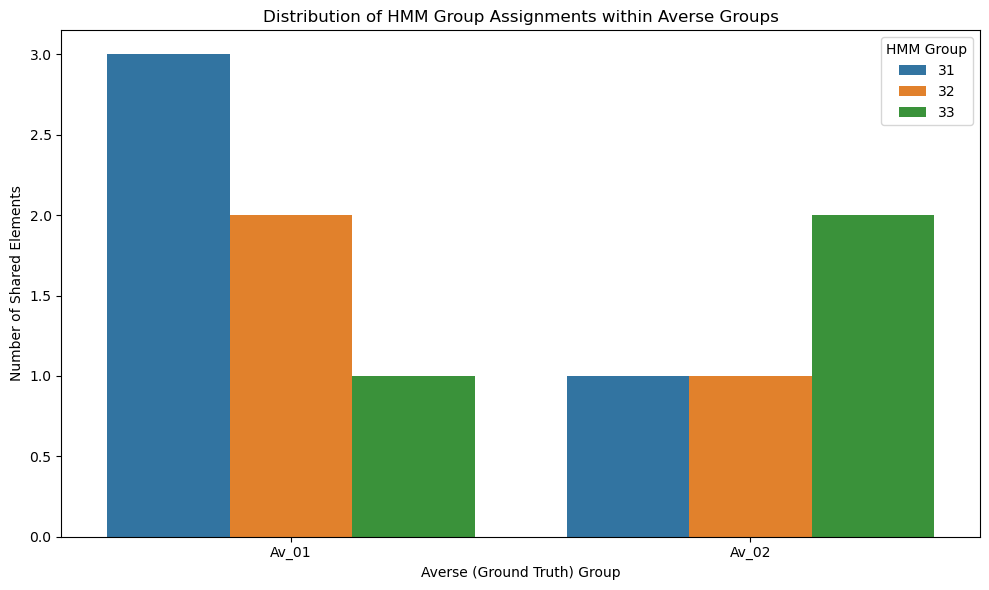

In [51]:
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

# Sample minimal data to demonstrate the idea
Averse = defaultdict(list, {
    'Av_01': [1, 2, 3, 4, 5, 6],
    'Av_02': [7, 8, 9, 10]
})

hmm_results = defaultdict(list, {
    '31': ['1', '2', '3', '7'],
    '32': ['4', '5', '8'],
    '33': ['6', '9', '10']
})

# Convert hmm_results values to integers
hmm_results_int = {k: list(map(int, v)) for k, v in hmm_results.items()}

# Reverse mapping: integer -> Av group
value_to_av = {}
for av_key, values in Averse.items():
    for val in values:
        value_to_av[val] = av_key

# Count how values from Averse groups are distributed across hmm groups
av_hmm_distribution = defaultdict(lambda: defaultdict(int))

for hmm_key, values in hmm_results_int.items():
    for val in values:
        av_group = value_to_av.get(val)
        if av_group:
            av_hmm_distribution[av_group][hmm_key] += 1

# Prepare data for plotting
plot_data = []
for av_group, hmm_map in av_hmm_distribution.items():
    for hmm_group, count in hmm_map.items():
        plot_data.append((av_group, hmm_group, count))

# Create a DataFrame for Seaborn
import pandas as pd
df = pd.DataFrame(plot_data, columns=['Averse Group', 'HMM Group', 'Count'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Averse Group', y='Count', hue='HMM Group')
plt.title("Distribution of HMM Group Assignments within Averse Groups")
plt.xlabel("Averse (Ground Truth) Group")
plt.ylabel("Number of Shared Elements")
plt.legend(title="HMM Group")
plt.tight_layout()
plt.show()
